# Analyzing the Stroop Effect

### Introduction

<a href="http://imbs.uci.edu/~kjameson/ECST/MacLeod_TheStroopEffect.pdf" target="_blank">The Stroop effect</a> is a classic result of experimental psychology, it is a phenomenon that occurs when you must say the color of a word but not the name of the word. For example, blue might be printed in red and you must say the color rather than the word. 

While it might sound simple, the Stroop effect refers to the delayed reaction times when the color of the word doesn't match the name of the word. It's easier to say the color of a word if it matches the semantic meaning of the word. For example, if someone asked you to say the color of the word "black" that was also printed in black ink, it would be much easier to say the correct color than if it were printed in green ink.

The task demonstrates the effect that interference can have when it comes to reaction time. It was first described during the 1930s by American psychologist John Ridley Stroop for whom the phenomenon is named. His original paper describing the effect has become one of the most famous, as well as one of the most frequently cited, in the history of psychology. The effect has been replicated hundreds of times by other researchers.

In this analysis, I will take a dataset of observations conducted as a series of tests on such stimuli as described above, which will allow us to then perform certain statistical tests in order to verify (or refute!) the Stroop Effect.

The dataset is a csv file that consists of two variables:

- Independant variable: is the congruency of the colour and text
- Dependant variable: duration (time) to recognise the colours or the texts

### Methodology

So to test this phenomenon, we want to be sure that in the case where the name & colour are different (Incongruent), that the mean response time is definately greater than the case where the name & colour are the same (Congruent). So it would be helpful to form our hypothesis so we can clearly separate these two types of cases in a mutually exclusive way.

To do this, we could use the following hypotheses:

- Null: The population mean reaction time will be equal to or less where text where the name & colour are Incongruent (compared to where the name & colour are Congruent)
- Alternative: The population mean reaction time will be greater for the text where the name & colour are Incongruent

Or using notation:

$$H_0: \mu_{Congruent} - \mu_{Incongruent} >= 0$$

$$H_1: \mu_{Congruent} - \mu_{Incongruent} < 0$$

Where **$\mu_{Congruent}$** is the population mean reaction time for the case where the name and colour are the same, and **$\mu_{Incongruent}$** is the population mean reaction time for the case where the name and colour are different.

By forming our hypotheses in this way, we ensure we only reject the null hypothesis (that there is no stroop effect) only if the case of the name & colour being different results in longer times (which is the defined stroop effect). In other words, we have ensured that our hypotheses most simply tests the proposition that either:

- There is no stroop effect (null)

OR

- There is a stroop effect (alternative)

To test these hypotheses, I will use a paired t-test. To use this test I will assume that that both the Congruent and Incongruent population sample mean distributions are normally distributed (ie the assumption of normality) and that the observations for each of these are paired & that each pair is independant (i.e. related to different conditions for the same stimulus).

Also considering the work of Bart et al (1998) on how large sample sizes should be for a t-test, he found that for moderately skewed or bimodal populations, the sample size should exceed 10, whilst for highly skewed populations the same size should exceed 20. It is also mentioned that these guidlines should be treated with caution especially if we have extereme outliers or large numbers of zeros in the data. 

Considering our sample size:

In [5]:
import pandas as pd

df = pd.read_csv('stroopdata.csv')
df.shape

(24, 2)

This exceeds Bart's recommended sample size of 20.

Considering outliers:

In [7]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


There seem to be no huge outliers in our dataset. 

Considering zeros in our data:

In [17]:
df_zeros = df[(df.T == 0).any()]
df_zeros

,Congruent,Incongruent


We seem to have no zeros in our data set. Therefore with these assumptions, I propose to use the paired t-test on the given data set.

### Analysis

In [4]:
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [5]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


Measure of the center:

- Mean: Congruent (14.05), Incongruent (22.02)
- Median: Congruent (14.36), Incongruent (21.02)

Measures of spread/variability:

- Std dev: Congruent (3.56), Incongruent (4.80)
- IQR (Inter-quartile range): Congruent (4.30), Incongruent (5.33)

Let us now look at the distributions of both the Congruent and Incongruent observations.

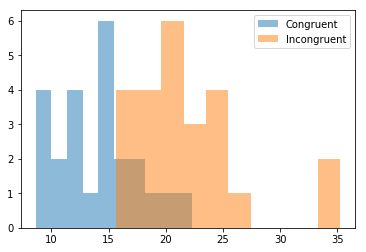

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

# Build the visualizations here
bins = 10
plt.hist(df['Congruent'], bins, alpha=0.5, label='Congruent')
plt.hist(df['Incongruent'], bins, alpha=0.5, label='Incongruent')
plt.legend(loc='upper right')

From the above histogram of the distributions, firstly we can see that there is a degree of overlap between the two distributions. But we can also see that the Incongruent samples are clearly at the higher end of the reaction times, and the Congruent samples are clearly in the lower end of reaction times.

We can also see that with the Incongruent samples, there are some small outliers at the top end of the reaction times.

Let us also plot boxplot's for each of these samples to further explore each distribution and help us predict the outcome of our hypothesis test:

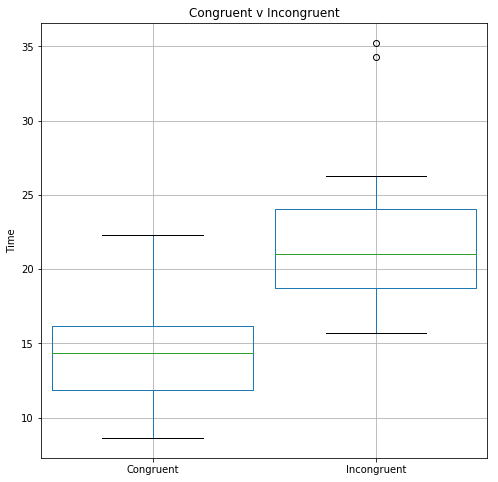

In [23]:
df.boxplot(figsize=(8,8), grid=True, widths=0.9)
plt.title('Congruent v Incongruent')
plt.ylabel('Time')
plt.show()

From the boxplot's we can see that not only is the median of the Incongruent samples bigger than the Congruent, but the entire inter-quartile range of the Incongruent samples is bigger than the inter-quartile range of the Congruent samples. This suggest a significant difference betweem the two samples.

On the basis of these observations of our sample data, we would predict that when we do our t-test that there will be a statisically significant difference in the two populations i.e. that the population mean for the Incongruent samples will be greater than for the population mean of the Congruent samples - therefore we would predict we will end up rejecting the null hypothesis (and therby confirm the stroop effect).

We will now perform the statistical test.

In [25]:
import scipy.stats as stats

# Perform the statistical test here

congruentVals = df['Congruent'].values.tolist()
incongruentVals = df['Incongruent'].values.tolist()

stats.ttest_rel(congruentVals,incongruentVals)

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

So this is a two tailed test and our hypothesis is directional (one-sided) so we must divide the pvalue by 2 to get our 97.5% confidence interval. 

In [26]:
0.000000041030005857111781/2

2.051500292855589e-08

**Given that this p value is well below our 0.025 type 1 error rate, therefore we reject the null hypothesis - and confirm the observation of the stroop effect in this analysis.**

### Conclusion

This result was consistant with the earlier predictions we made about the likely result of the t-test. The mean of the observed values does seem like a good statistic to use for observing this effect.

Most scholars believe that the stroop effect is due to differences in the way our brain works with regard to reading and colour recognition. In particular, that one part of the brain is involved in recognising words and a different part of the brain is involved in underdstanding colour. Furthermore, they theorise that reading words occurs almost automatically wheras understanding colour requires more cognitive effort. 

It is beleived that the stroop effect is a result of these two processing systems in the brain coming into conflict (or interference). Therefore, the difficulty of understanding is increased as a result of the conflicting sources of information, and therby the time taken to resolve those differences is also increased. (see MacLeod, Colin M (1991)).

Similar tasks that could produce a similar effect i.e. a similar conflict between these parts of the brain could be for example a picture-word interferece task (see MacLeod, Colin M (2015)), where a conflicting word is embedded in a picture - for example the word 'elephant' inside the picture of a sheep. Another variation is where words are matched to geometric shapes shortly after the words. The matching speed is slowed by incongruent shapes being present at the time of word presentation. (Compton & Flowers (1977)).

### References

Bart, J. et al. (1998). Sampling and statistical methods for behavioural ecologists. Cambridge University Press, Cambridge.

http://assets.cambridge.org/97805214/50959/sample/9780521450959web.pdf

MacLeod, Colin M (1991). Half a Century of Research on the Stroop Effect: AN Integrative Review

http://melaniestefan.net/MacLeod1991.pdf

MacLeod, Colin M (2015). The Stroop Effect

http://imbs.uci.edu/~kjameson/ECST/MacLeod_TheStroopEffect.pdf

Compton, R. E, & Flowers, J. H. (1977). Pictorial interference with geometric shapes and achromatic shades. PerceptionandPsychophys- ics, 22, 303-309.

http://digitalcommons.unl.edu/cgi/viewcontent.cgi?article=1467&context=psychfacpub